<a href="https://colab.research.google.com/github/KJM94/career/blob/main/py/%EC%BD%94%EC%9D%B8_%ED%9A%8D%EB%93%9D%EC%B2%98%EC%97%90_%EA%B4%80%ED%95%9C_%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이클립스 코인 획득처에 관한 연관 및 상관관계 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/ra')

- statsmodels : 검정 및 추정, 회귀분석, 시계열 분석 등의 다양한 통계분석 기능

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import rc
import seaborn as sns
%matplotlib inline

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [ ]:
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/ra


In [ ]:
dl_frame = pd.read_csv('DeleteItem.csv')
gi_frame = pd.read_csv('GiveItem.csv')

In [ ]:
gi_frame = gi_frame.drop_duplicates(['fdUserNum', 'fdDateTime'], keep='first')

gi_frame

,fdDateTime,fdAuthUserNum,fdUserNum,fdNickName,fdItemNum,fdItemName,fdCount,fdResultCount,fdDesc
0,2021-12-02 00:00:04.000,11010903,7672566,묘검,96190,이클립스 코인 1개,1,315,할인 쿠폰 사용
2,2021-12-02 00:00:06.000,70029285,18269687,밥비비,96190,이클립스 코인 1개,1,12,할인 쿠폰 사용
3,2021-12-02 00:00:06.000,44847012,4320649,계벽,96190,이클립스 코인 1개,1,1,할인 쿠폰 사용
6,2021-12-02 00:00:07.000,57817208,14936475,수능특강국어,96190,이클립스 코인 1개,1,14,할인 쿠폰 사용
7,2021-12-02 00:00:07.000,55793806,13103902,문신박,96190,이클립스 코인 1개,1,10,할인 쿠폰 사용
...,...,...,...,...,...,...,...,...,...
6741265,2021-12-08 23:59:58.000,86705352,18693744,Ranma,96194,이클립스 코인 10개,1,53,보물상자 열기
6741266,2021-12-08 23:59:59.000,125959747,19286688,까비,96192,이클립스 코인 3개,1,13,미션 보상
6741267,2021-12-08 23:59:59.000,45701325,5018235,효인다빈,96193,이클립스 코인 5개,1,27,보물상자 열기
6741269,2021-12-08 23:59:59.000,11019827,10733066,Militar,96193,이클립스 코인 5개,1,19,보물상자 열기


In [ ]:
gi_frame.groupby('fdDesc').size()

fdDesc
GM툴 - 아이템 지급                            70
usp_PointGathering_ReceiveReward    181703
usp_RewardTeamLeague                 90297
게임 결과 보상                              9915
경쟁 이벤트 팀 가입                          81427
경쟁 이벤트 포인트별 보상                       77652
교환시스템 사용                             32654
구매결정                                  5214
미션 보상                               692355
보물상자 열기                             689595
선물함                                  45839
퀘스트 보상                               51820
할인 쿠폰 사용                            122582
dtype: int64

In [ ]:
nGar = gi_frame.shape[0]
nFar = gi_frame.shape[1]

print(nGar, nFar)

2081123 9


- 범주형 변수를 이진형 변수 (0, 1)로 변환

In [ ]:
gi_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081123 entries, 0 to 6741270
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   fdDateTime     object
 1   fdAuthUserNum  int64 
 2   fdUserNum      int64 
 3   fdNickName     object
 4   fdItemNum      int64 
 5   fdItemName     object
 6   fdCount        int64 
 7   fdResultCount  int64 
 8   fdDesc         object
dtypes: int64(5), object(4)
memory usage: 158.8+ MB


In [ ]:
print(gi_frame.fdDesc.unique())

['할인 쿠폰 사용' '선물함' '구매결정' '경쟁 이벤트 팀 가입' 'GM툴 - 아이템 지급'
 'usp_PointGathering_ReceiveReward' '보물상자 열기' '경쟁 이벤트 포인트별 보상' '교환시스템 사용'
 '미션 보상' 'usp_RewardTeamLeague' '퀘스트 보상' '게임 결과 보상']


In [ ]:
dummy_c = np.repeat(0, nGar) # 할인 쿠폰 사용
dummy_p = np.repeat(0, nGar) # 선물함
dummy_b = np.repeat(0, nGar) # 구매결정
dummy_v = np.repeat(0, nGar) # 경쟁 이벤트 팀 가입
dummy_g = np.repeat(0, nGar) # GM툴 - 아이템 지급
dummy_r = np.repeat(0, nGar) # usp_PointGathering_ReceiveReward
dummy_t = np.repeat(0, nGar) # 보물상자 열기
dummy_vs = np.repeat(0, nGar) # 경쟁 이벤트 포인트별 보상
dummy_tr = np.repeat(0, nGar) # 교환 시스템 사용
dummy_m = np.repeat(0, nGar) # 미션 보상
dummy_ul = np.repeat(0, nGar) # usp_RewardTeamLeague
dummy_q = np.repeat(0, nGar) # 퀘스트 보상
dummy_re = np.repeat(0, nGar) # 게임 결과 보상

In [ ]:
dummy_c

array([0, 0, 0, ..., 0, 0, 0])

boolean 인덱싱을 통해 boolean index 행렬 생성

In [ ]:
c_idx = np.array(gi_frame.fdDesc == '할인 쿠폰 사용')
p_idx = np.array(gi_frame.fdDesc == '선물함')
b_idx = np.array(gi_frame.fdDesc == '구매결정')
v_idx = np.array(gi_frame.fdDesc == '경쟁 이벤트 팀 가입')
g_idx = np.array(gi_frame.fdDesc == 'GM툴 - 아이템 지급')
r_idx = np.array(gi_frame.fdDesc == 'usp_PointGathering_ReceiveReward')
t_idx = np.array(gi_frame.fdDesc == '보물상자 열기')
vs_idx = np.array(gi_frame.fdDesc == '경쟁 이벤트 포인트별 보상')
tr_idx = np.array(gi_frame.fdDesc == '교환시스템 사용')
m_idx = np.array(gi_frame.fdDesc == '미션 보상')
ul_idx = np.array(gi_frame.fdDesc == 'usp_RewardTeamLeague')
q_idx = np.array(gi_frame.fdDesc == '퀘스트 보상')
re_idx = np.array(gi_frame.fdDesc == '게임 결과 보상')



In [ ]:
c_idx

array([ True,  True,  True, ..., False, False, False])

In [ ]:
dummy_c[c_idx] = 1
dummy_p[p_idx] = 1
dummy_b[b_idx] = 1
dummy_v[v_idx] = 1
dummy_g[g_idx] = 1
dummy_r[r_idx] = 1
dummy_t[t_idx] = 1
dummy_vs[vs_idx] = 1
dummy_tr[tr_idx] = 1
dummy_m[m_idx] = 1
dummy_ul[ul_idx] = 1
dummy_q[q_idx] = 1
dummy_re[re_idx] = 1

In [ ]:
dummy_c

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
Idx = pd.DataFrame({"할인 쿠폰 사용" : dummy_c, "선물함" : dummy_p, "구매결정" : dummy_b, "경쟁 이벤트 팀 가입 " : dummy_v, 
                    "GM툴 - 아이템 지급" : dummy_g, "usp_PointGathering_ReceiveReward" : dummy_r, "보물상자 열기" : dummy_t, 
                    "경쟁 이벤트 포인트별 보상" : dummy_vs, "교환시스템 사용" : dummy_tr, "미션 보상" : dummy_m, 
                    "usp_RewardTeamLeague" : dummy_ul, "퀘스트 보상" : dummy_q, "게임 결과 보상" : dummy_re})

In [ ]:
Idx

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081118,0,0,0,0,0,0,1,0,0,0,0,0,0
2081119,0,0,0,0,0,0,0,0,0,1,0,0,0
2081120,0,0,0,0,0,0,1,0,0,0,0,0,0
2081121,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
gi_frame_ = gi_frame.drop(["fdDateTime", "fdAuthUserNum", "fdNickName", "fdItemNum", "fdItemName", "fdDesc", "fdCount", "fdResultCount"], axis = 1, inplace = False)
mlr_data = pd.concat((gi_frame_, Idx), 1)
mlr_data.head()

,fdUserNum,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,7672566.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18269687.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4320649.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mlr_data

,fdUserNum,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,7672566.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18269687.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4320649.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741265,18693744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6741266,19286688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6741267,5018235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6741269,10733066.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mlr_data = mlr_data.dropna()

mlr_data

,fdUserNum,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,7672566.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18269687.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4320649.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14936475.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,13103902.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081114,942276.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2081116,14923633.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2081118,18811298.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2081120,942276.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mlr_data.duplicated(['fdUserNum'])

0          False
2          False
3          False
6          False
7          False
           ...  
2081114     True
2081116     True
2081118     True
2081120     True
2081122     True
Length: 521881, dtype: bool

In [ ]:
Total = mlr_data.groupby(by=['fdUserNum']).sum().groupby(level=[0]).cumsum()

Total

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
fdUserNum,,,,,,,,,,,,,
7699.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
8170.0,12.0,1.0,1.0,10.0,0.0,10.0,58.0,3.0,1.0,38.0,6.0,4.0,0.0
8659.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12394.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13286.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20540852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20540853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20540855.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Total_b = Total.iloc[:, 0:] = Total.iloc[:, 0:].astype(bool)

Total_b

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
fdUserNum,,,,,,,,,,,,,
7699.0,False,False,False,False,False,False,True,False,False,True,False,False,False
8170.0,True,True,True,True,False,True,True,True,True,True,True,True,False
8659.0,False,False,False,False,False,False,True,False,False,False,False,False,False
12394.0,True,False,False,False,False,False,False,True,False,False,False,False,False
13286.0,True,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20540852.0,False,False,False,False,False,False,False,False,False,True,False,False,False
20540853.0,False,False,False,False,False,False,False,False,False,True,False,False,False
20540855.0,False,False,False,False,False,False,True,False,False,False,False,False,False


## 획득

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules

- 지지도 : 전체 거래 항목 중에서 항목들을 동시에 포함하는 거래의 비율

In [ ]:
frequent_itemsets = apriori(Total_b, min_support=0.3, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.391685,(할인 쿠폰 사용)
1,0.453941,(usp_PointGathering_ReceiveReward)
2,0.732204,(보물상자 열기)
3,0.732918,(미션 보상)
4,0.306377,(usp_RewardTeamLeague)
5,0.340197,"(보물상자 열기, 할인 쿠폰 사용)"
6,0.341600,"(미션 보상, 할인 쿠폰 사용)"
7,0.401532,"(usp_PointGathering_ReceiveReward, 보물상자 열기)"
8,0.400704,"(usp_PointGathering_ReceiveReward, 미션 보상)"
9,0.573805,"(보물상자 열기, 미션 보상)"


- 지지도 최소 0.3 이상 연관분석 측정

---------------------------------------------

- 신뢰도 : 포함된 아이템의 연관규칙이 유용한 규칙일 가능성

In [ ]:
association_rules_df = association_rules(frequent_itemsets, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )

association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(보물상자 열기),(할인 쿠폰 사용),0.732204,0.391685,0.340197,0.464620,1.186207,0.053403,1.136230
1,(할인 쿠폰 사용),(보물상자 열기),0.391685,0.732204,0.340197,0.868546,1.186207,0.053403,2.037184
2,(미션 보상),(할인 쿠폰 사용),0.732918,0.391685,0.341600,0.466083,1.189942,0.054527,1.139342
3,(할인 쿠폰 사용),(미션 보상),0.391685,0.732918,0.341600,0.872129,1.189942,0.054527,2.088689
4,(usp_PointGathering_ReceiveReward),(보물상자 열기),0.453941,0.732204,0.401532,0.884547,1.208060,0.069155,2.319523
5,(보물상자 열기),(usp_PointGathering_ReceiveReward),0.732204,0.453941,0.401532,0.548388,1.208060,0.069155,1.209133
6,(usp_PointGathering_ReceiveReward),(미션 보상),0.453941,0.732918,0.400704,0.882723,1.204395,0.068003,2.277356
7,(미션 보상),(usp_PointGathering_ReceiveReward),0.732918,0.453941,0.400704,0.546724,1.204395,0.068003,1.204695
8,(보물상자 열기),(미션 보상),0.732204,0.732918,0.573805,0.783667,1.069243,0.037159,1.234591
9,(미션 보상),(보물상자 열기),0.732918,0.732204,0.573805,0.782905,1.069243,0.037159,1.233540


- 신뢰도 0.005 이상의 항목 측정

In [ ]:
featuresCorr = Total.corr()    # 상관관계 분석
featuresCorr

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
할인 쿠폰 사용,1.000000,0.370666,0.157713,0.396611,0.002230,0.535341,0.616687,0.440632,0.337846,0.614750,0.449026,0.364977,0.198207
선물함,0.370666,1.000000,0.127798,0.334777,0.008922,0.455816,0.516425,0.366195,0.280821,0.523663,0.381421,0.314768,0.169807
구매결정,0.157713,0.127798,1.000000,0.197089,-0.000101,0.187317,0.231028,0.167573,0.105368,0.205488,0.156499,0.176547,0.053224
경쟁 이벤트 팀 가입,0.396611,0.334777,0.197089,1.000000,0.011094,0.507827,0.621626,0.435408,0.271436,0.551853,0.403204,0.478683,0.145122
GM툴 - 아이템 지급,0.002230,0.008922,-0.000101,0.011094,1.000000,0.018075,0.010023,0.007454,0.006912,0.011238,0.013314,0.002093,-0.000085
usp_PointGathering_ReceiveReward,0.535341,0.455816,0.187317,0.507827,0.018075,1.000000,0.752082,0.540991,0.401797,0.747631,0.543204,0.466503,0.234930
보물상자 열기,0.616687,0.516425,0.231028,0.621626,0.010023,0.752082,1.000000,0.626908,0.451288,0.853185,0.615151,0.566855,0.271326
경쟁 이벤트 포인트별 보상,0.440632,0.366195,0.167573,0.435408,0.007454,0.540991,0.626908,1.000000,0.314837,0.613569,0.440872,0.404645,0.196839
교환시스템 사용,0.337846,0.280821,0.105368,0.271436,0.006912,0.401797,0.451288,0.314837,1.000000,0.464994,0.331834,0.258308,0.160909
미션 보상,0.614750,0.523663,0.205488,0.551853,0.011238,0.747631,0.853185,0.613569,0.464994,1.000000,0.639187,0.504796,0.294827


- 각 항목끼리 상관계수 측정

- 선물함이 모든 항목들에 대하여 적지 않은 비율을 차지

- GM툴 아이템 지급에 대한 항목은 어떤 항목과도 상관계수가 적음.
- 시즌패스 보상은 전체적으로 높은 상관계수를 보임.
- 할인 쿠폰 사용과 구매결정 사이의 상관계수는 작은 지표를 보이고 있으며 할인 쿠폰 사용에 대한 보물 상자 열기와 미션 보상에 대한 상관계수가 높은 반면 구매결정에 대한 보물상자 열기와 미션 보상에 대한 상관계수는 낮게 나타남.




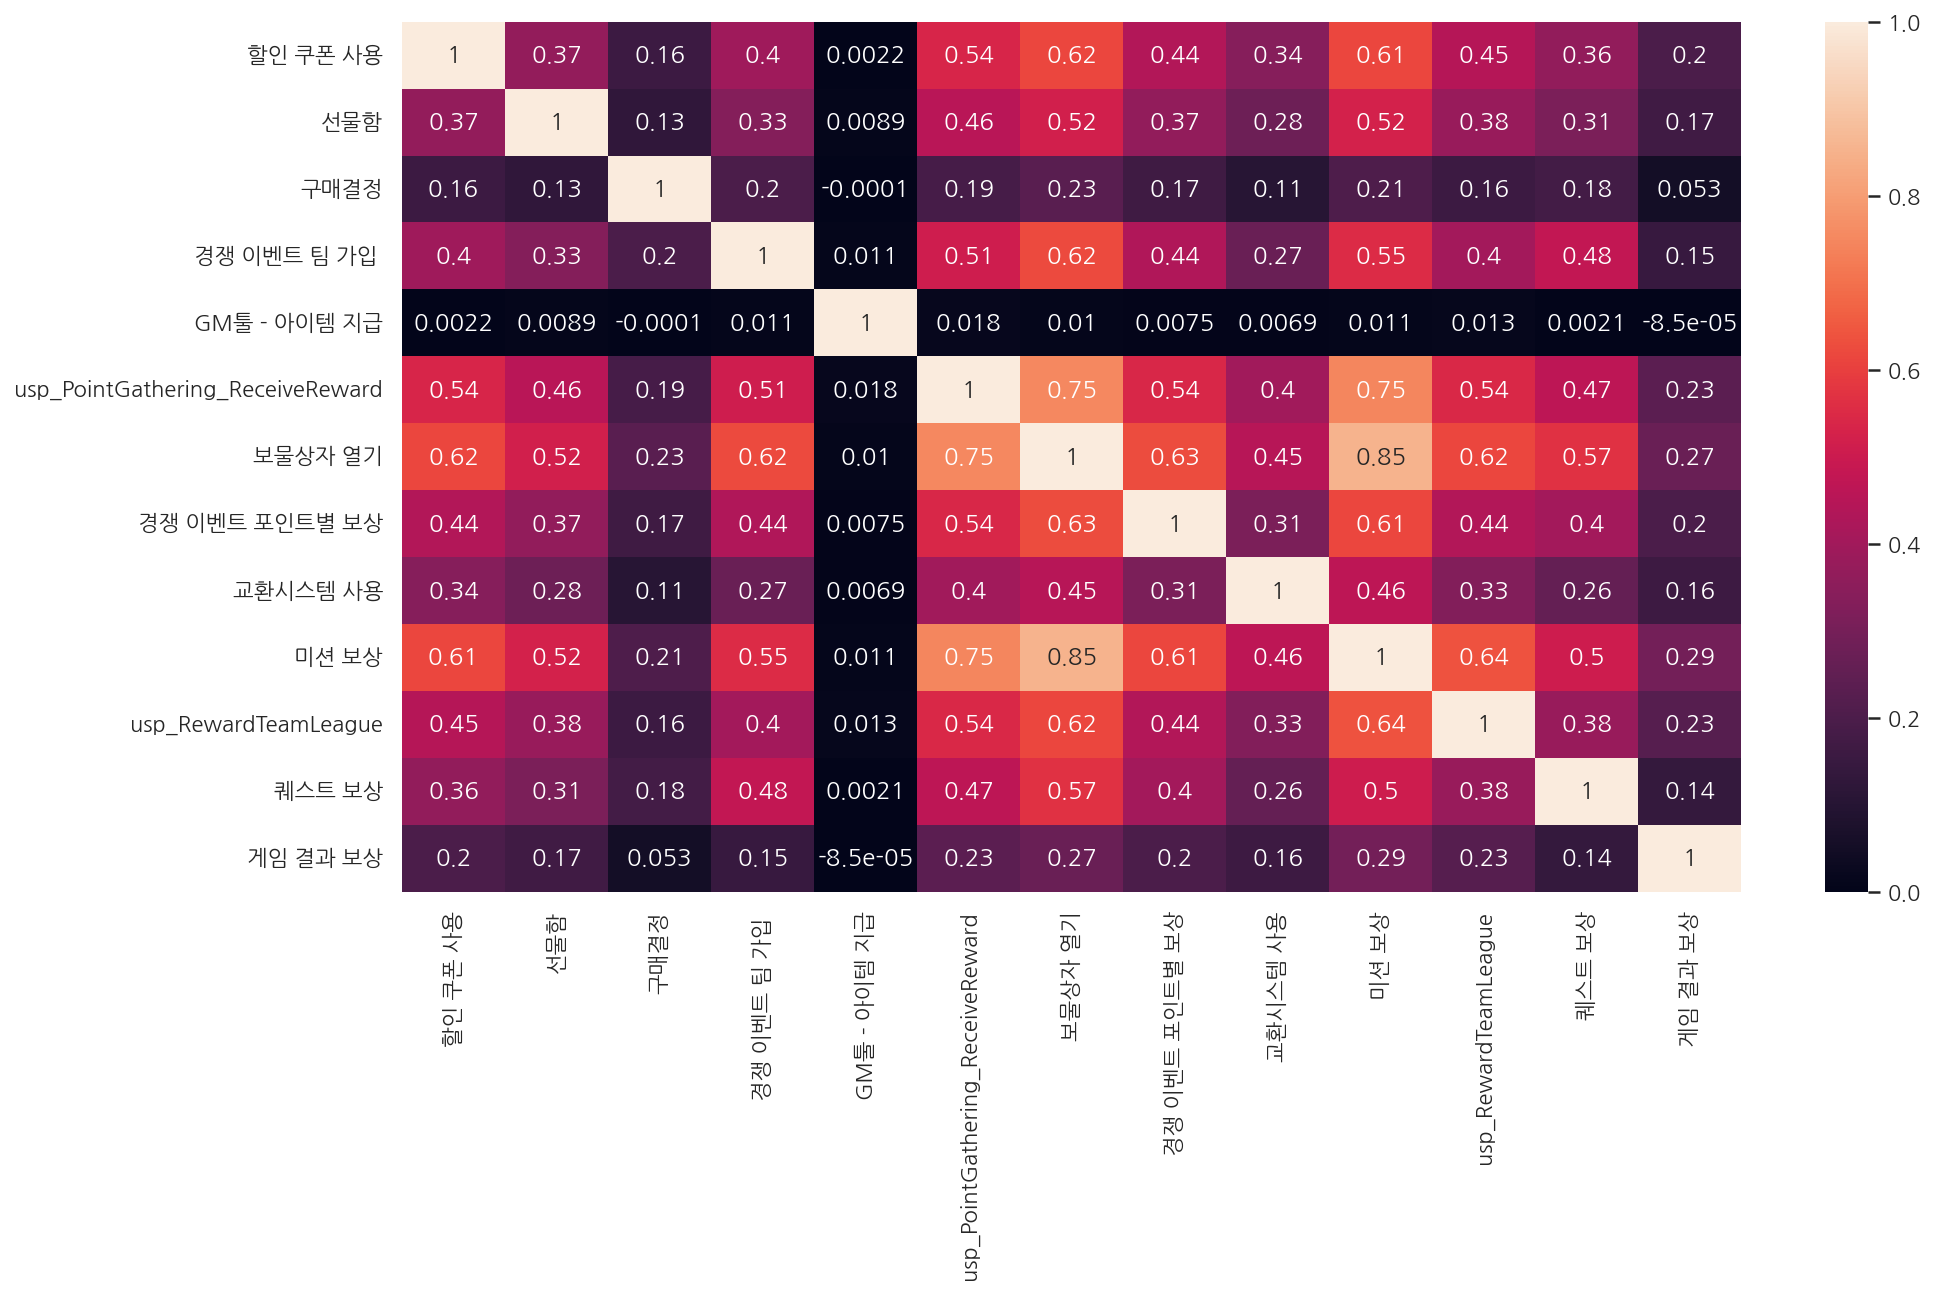

In [ ]:
sns.set(font = "NanumGothic", rc = {'figure.figsize':(15,8), "axes.unicode_minus" : False})
sns.heatmap(featuresCorr, annot = True)


In [ ]:
dl_frame.head()

,fdDateTime,fdAuthUserNum,fdUserNum,fdNickName,fdItemNum,fdDelCount,fdBeforeCount,fdAll,fdDesc
0,2021-12-02 06:45:07.710,10913471,14947265,김포션,96189,50,1010,0,교환시스템 사용
1,2021-12-02 06:45:07.710,10913471,14947265,김포션,96189,50,1010,0,교환시스템 사용
2,2021-12-02 06:45:10.163,10913471,14947265,김포션,96189,50,960,0,교환시스템 사용
3,2021-12-02 06:45:10.163,10913471,14947265,김포션,96189,50,960,0,교환시스템 사용
4,2021-12-02 06:45:12.310,10913471,14947265,김포션,96189,50,910,0,교환시스템 사용


In [ ]:
dl_frame = dl_frame.drop_duplicates(['fdUserNum', 'fdDateTime'], keep='first')

dl_frame

,fdDateTime,fdAuthUserNum,fdUserNum,fdNickName,fdItemNum,fdDelCount,fdBeforeCount,fdAll,fdDesc
0,2021-12-02 06:45:07.710,10913471,14947265,김포션,96189,50,1010,0,교환시스템 사용
2,2021-12-02 06:45:10.163,10913471,14947265,김포션,96189,50,960,0,교환시스템 사용
4,2021-12-02 06:45:12.310,10913471,14947265,김포션,96189,50,910,0,교환시스템 사용
6,2021-12-02 06:45:15.463,10913471,14947265,김포션,96189,50,860,0,교환시스템 사용
8,2021-12-02 06:45:18.493,10913471,14947265,김포션,96189,50,810,0,교환시스템 사용
...,...,...,...,...,...,...,...,...,...
1650454,2021-12-08 23:59:55.963,77361983,18478628,nhy121,96189,15,56,0,캡술머신 사용
1650455,2021-12-08 23:59:57.807,10671964,10337536,송양,96189,15,122,0,캡술머신 사용
1650456,2021-12-08 23:59:57.907,55289817,12653888,무햐,96189,15,103,0,캡술머신 사용
1650457,2021-12-08 23:59:58.230,127528657,19353965,둥이나인,96189,50,55,0,교환시스템 사용


In [ ]:
dl_frame.groupby('fdDesc').size()

fdDesc
usp_competitionEvent_UpgradeSeasonPass              10722
usp_competitionEvent_addPoint_ToNextLevelReward     31655
교환시스템 사용                                            20085
캡술머신 사용                                            895536
dtype: int64

In [ ]:
nDar = dl_frame.shape[0]
nLar = dl_frame.shape[1]

print(nDar, nLar)

957998 9


In [ ]:
dl_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957998 entries, 0 to 1650458
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   fdDateTime     957998 non-null  object
 1   fdAuthUserNum  957998 non-null  int64 
 2   fdUserNum      957998 non-null  int64 
 3   fdNickName     957998 non-null  object
 4   fdItemNum      957998 non-null  int64 
 5   fdDelCount     957998 non-null  int64 
 6   fdBeforeCount  957998 non-null  int64 
 7   fdAll          957998 non-null  int64 
 8   fdDesc         957998 non-null  object
dtypes: int64(6), object(3)
memory usage: 73.1+ MB


In [ ]:
print(dl_frame.fdDesc.unique())

['교환시스템 사용' '캡술머신 사용' 'usp_competitionEvent_addPoint_ToNextLevelReward'
 'usp_competitionEvent_UpgradeSeasonPass']


In [ ]:
dummy_ttr = np.repeat(0, nDar) # 교환시스템 사용
dummy_ccp = np.repeat(0, nDar) # 캡슐머신 사용
dummy_pnr = np.repeat(0, nDar) # usp_competitionEvent_addPoint_ToNextLevelReward
dummy_usp = np.repeat(0, nDar) # usp_competitionEvent_UpgradeSeasonPass


In [ ]:
dummy_ttr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ttr_idx = np.array(dl_frame.fdDesc == '교환시스템 사용')
ccp_idx = np.array(dl_frame.fdDesc == '캡술머신 사용')
pnr_idx = np.array(dl_frame.fdDesc == 'usp_competitionEvent_addPoint_ToNextLevelReward')
usp_idx = np.array(dl_frame.fdDesc == 'usp_competitionEvent_UpgradeSeasonPass')


In [ ]:
ttr_idx

array([ True,  True,  True, ..., False,  True, False])

In [ ]:
dummy_ttr[ttr_idx] = 1
dummy_ccp[ccp_idx] = 1
dummy_pnr[pnr_idx] = 1
dummy_usp[usp_idx] = 1


In [ ]:
ddx = pd.DataFrame({"교환시스템 사용" : dummy_ttr, "캡술머신 사용" : dummy_ccp, "usp_competitionEvent_addPoint_ToNextLevelReward" : dummy_pnr,
                    "usp_competitionEvent_UpgradeSeasonPass" : dummy_usp})

In [ ]:
ddx

,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
957993,0,1,0,0
957994,0,1,0,0
957995,0,1,0,0
957996,1,0,0,0


In [ ]:
dl_frame_ = dl_frame.drop(["fdDateTime", "fdAuthUserNum", "fdNickName", "fdItemNum", "fdDesc", "fdDelCount", "fdBeforeCount", "fdAll"], axis = 1, inplace = False)
mri_data = pd.concat((dl_frame_, ddx), 1)
mri_data.head()

,fdUserNum,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,14947265.0,1.0,0.0,0.0,0.0
1,NaN,1.0,0.0,0.0,0.0
2,14947265.0,1.0,0.0,0.0,0.0
3,NaN,1.0,0.0,0.0,0.0
4,14947265.0,1.0,0.0,0.0,0.0


In [ ]:
mri_data

,fdUserNum,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,14947265.0,1.0,0.0,0.0,0.0
1,NaN,1.0,0.0,0.0,0.0
2,14947265.0,1.0,0.0,0.0,0.0
3,NaN,1.0,0.0,0.0,0.0
4,14947265.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1650454,18478628.0,NaN,NaN,NaN,NaN
1650455,10337536.0,NaN,NaN,NaN,NaN
1650456,12653888.0,NaN,NaN,NaN,NaN
1650457,19353965.0,NaN,NaN,NaN,NaN


In [ ]:
mri_data = mri_data.dropna()

mri_data

,fdUserNum,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,14947265.0,1.0,0.0,0.0,0.0
2,14947265.0,1.0,0.0,0.0,0.0
4,14947265.0,1.0,0.0,0.0,0.0
6,14947265.0,1.0,0.0,0.0,0.0
8,14947265.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
957988,2010444.0,0.0,1.0,0.0,0.0
957990,20327963.0,0.0,1.0,0.0,0.0
957992,3921644.0,0.0,1.0,0.0,0.0
957994,18957298.0,0.0,1.0,0.0,0.0


In [ ]:
mri_data.duplicated(['fdUserNum'])

0         False
2          True
4          True
6          True
8          True
          ...  
957988     True
957990     True
957992     True
957994     True
957996     True
Length: 478974, dtype: bool

In [ ]:
Totald = mri_data.groupby(by=['fdUserNum']).sum().groupby(level=[0]).cumsum()

Totald

,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
fdUserNum,,,,
8170.0,8.0,318.0,8.0,3.0
18719.0,0.0,6.0,0.0,1.0
53463.0,1.0,37.0,2.0,1.0
56453.0,0.0,10.0,0.0,0.0
67341.0,0.0,11.0,0.0,0.0
...,...,...,...,...
20541716.0,1.0,79.0,4.0,0.0
20541827.0,1.0,69.0,2.0,1.0
20541829.0,1.0,70.0,3.0,0.0


In [ ]:
Totald_b = Totald.iloc[:, 0:] = Totald.iloc[:, 0:].astype(bool)

Totald_b

,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
fdUserNum,,,,
8170.0,True,True,True,True
18719.0,False,True,False,True
53463.0,True,True,True,True
56453.0,False,True,False,False
67341.0,False,True,False,False
...,...,...,...,...
20541716.0,True,True,True,False
20541827.0,True,True,True,True
20541829.0,True,True,True,False


## 소비

In [ ]:
frequent_itemsetsd = apriori(Totald_b, min_support=0.3, use_colnames=True)

frequent_itemsetsd

,support,itemsets
0,0.986533,(캡술머신 사용)
1,0.301318,(usp_competitionEvent_addPoint_ToNextLevelReward)


In [ ]:
featuresCorrs = Totald.corr()    # 상관관계 분석
featuresCorrs

,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
교환시스템 사용,1.000000,0.763398,0.608813,0.529965
캡술머신 사용,0.763398,1.000000,0.766497,0.665088
usp_competitionEvent_addPoint_ToNextLevelReward,0.608813,0.766497,1.000000,0.490830
usp_competitionEvent_UpgradeSeasonPass,0.529965,0.665088,0.490830,1.000000


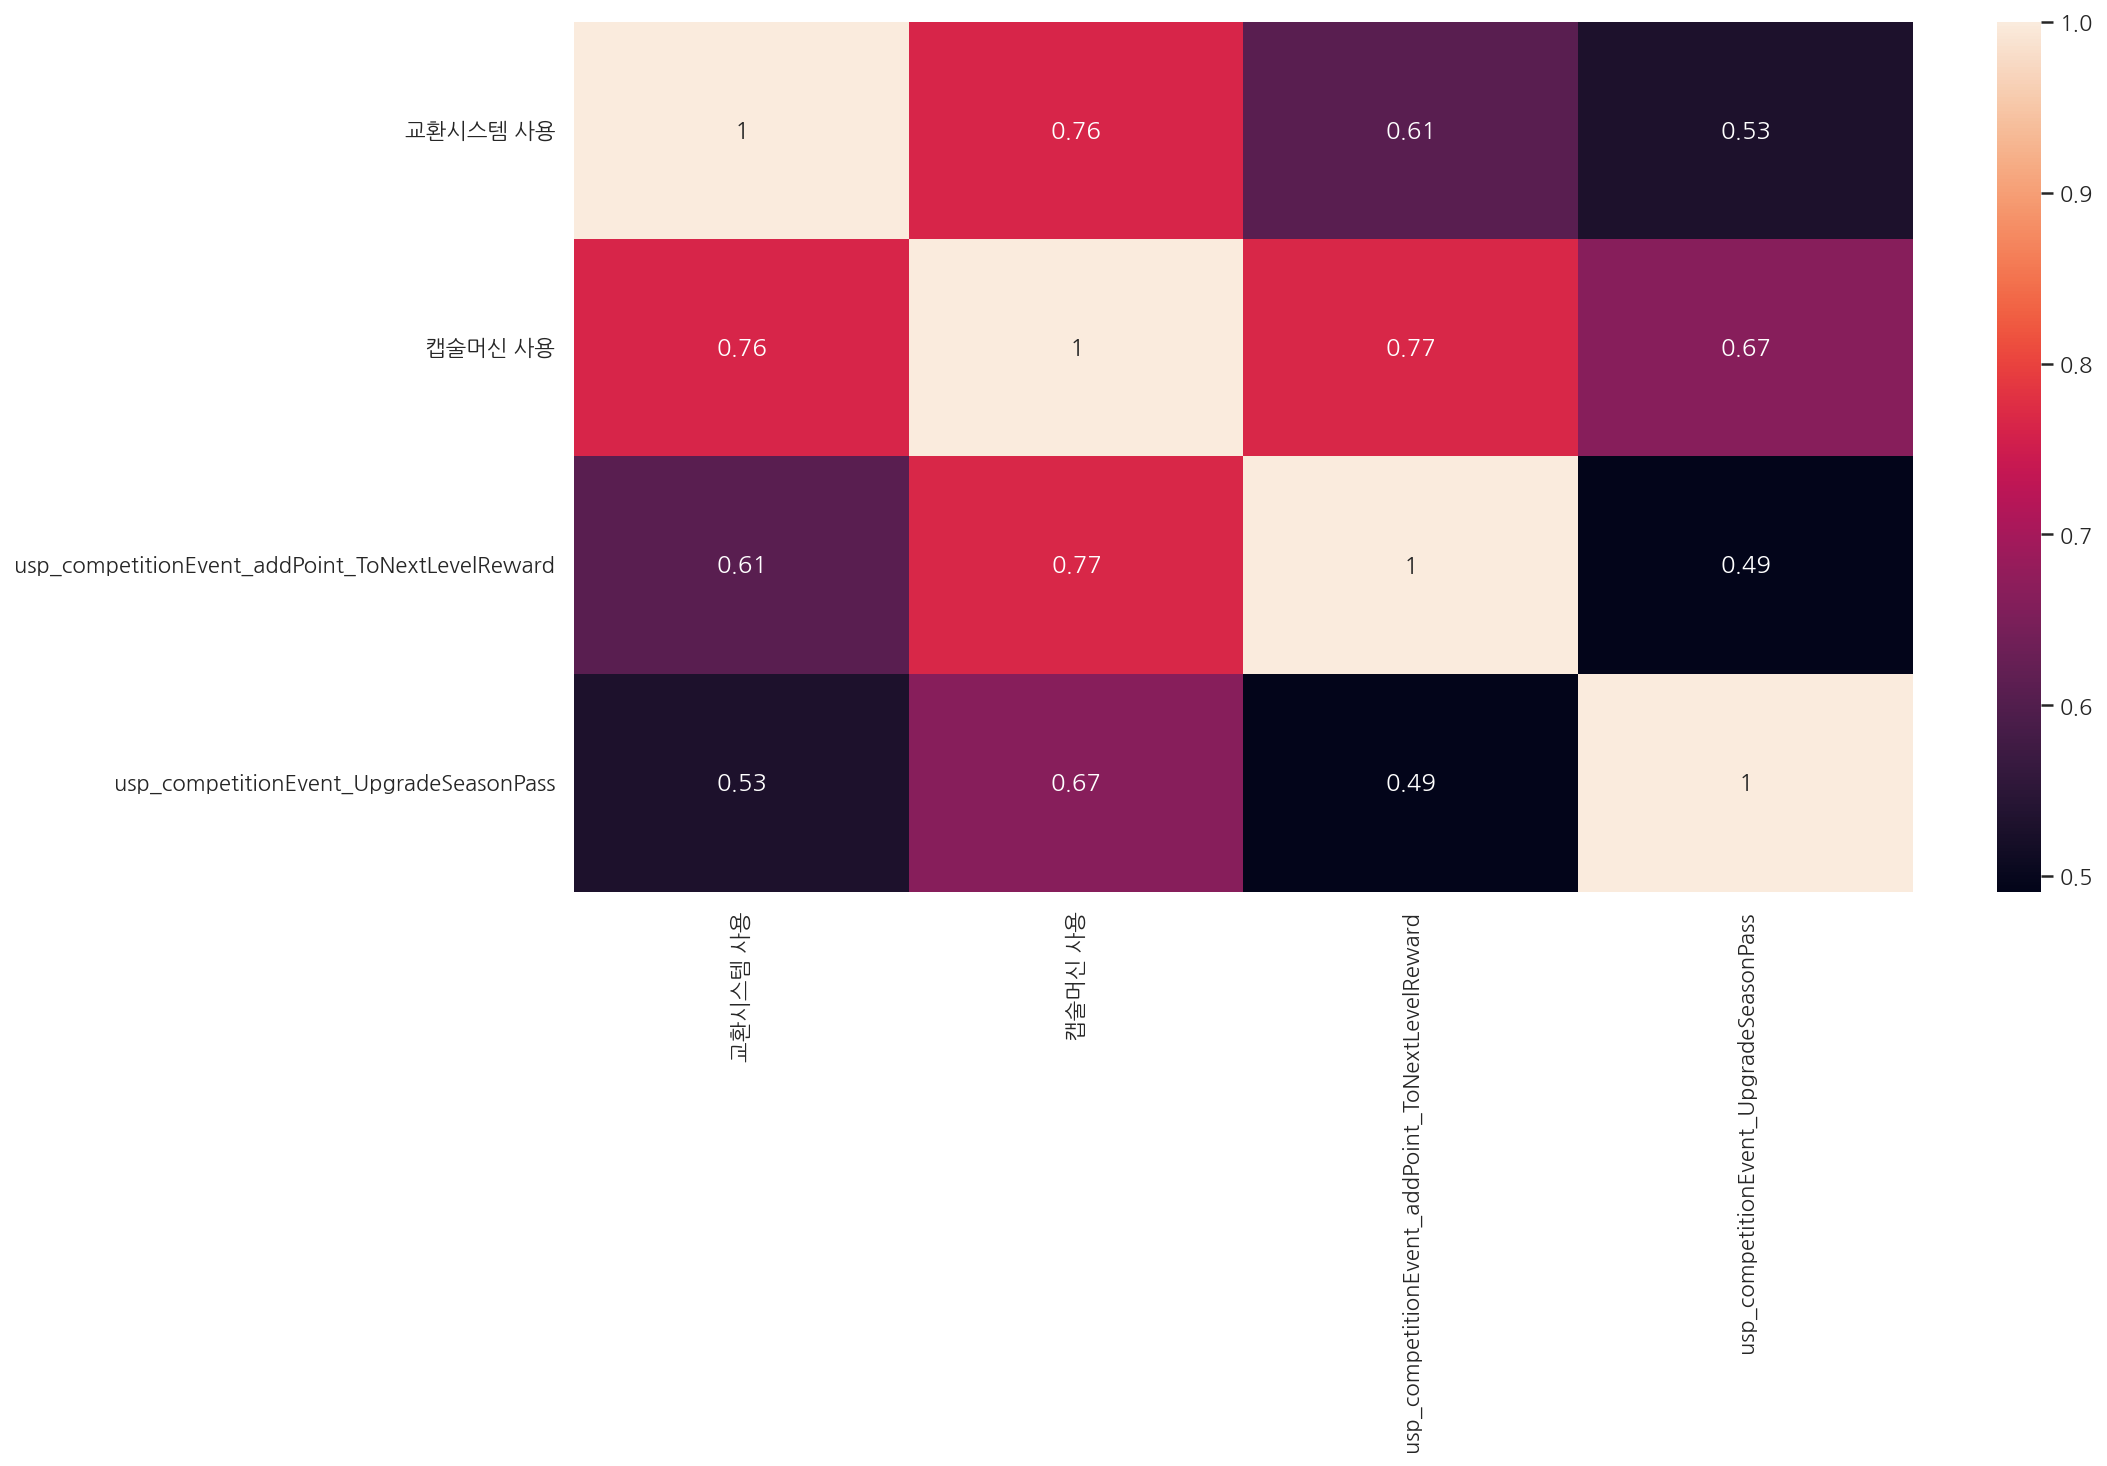

In [ ]:
sns.set(font = "NanumGothic", rc = {'figure.figsize':(15,8), "axes.unicode_minus" : False})
sns.heatmap(featuresCorrs, annot = True)


## 획득과 소비 연관 및 상관 관계

In [ ]:
merge_inner = pd.merge(Total, Totald, how='inner', on='fdUserNum')

merge_inner

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
fdUserNum,,,,,,,,,,,,,,,,,
8170,33,12,0,2,0,250,887,13,0,198,58,6,6,8.0,318.0,8.0,3.0
18719,19,0,0,2,0,3,41,3,1,53,1,6,0,0.0,6.0,0.0,1.0
53463,7,11,0,2,0,126,277,11,12,187,36,6,10,1.0,37.0,2.0,1.0
56453,5,2,0,2,0,36,114,10,0,111,7,0,0,0.0,10.0,0.0,0.0
67341,7,2,0,2,0,31,118,8,0,171,2,6,0,0.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20541716,10,0,0,2,0,12,34,0,0,0,0,0,0,1.0,79.0,4.0,0.0
20541827,10,0,0,0,0,0,44,0,0,0,0,0,0,1.0,69.0,2.0,1.0
20541829,10,0,0,0,0,0,47,0,0,0,0,0,0,1.0,70.0,3.0,0.0


- 소비 데이터가 없는 유저는 집계되지 않음.

In [ ]:
merge_innera = merge_inner.iloc[:, 0:] = merge_inner.iloc[:, 0:].astype(bool)

merge_innera

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
fdUserNum,,,,,,,,,,,,,,,,,
8170,True,True,False,True,False,True,True,True,False,True,True,True,True,True,True,True,True
18719,True,False,False,True,False,True,True,True,True,True,True,True,False,False,True,False,True
53463,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
56453,True,True,False,True,False,True,True,True,False,True,True,False,False,False,True,False,False
67341,True,True,False,True,False,True,True,True,False,True,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20541716,True,False,False,True,False,True,True,False,False,False,False,False,False,True,True,True,False
20541827,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True
20541829,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False


In [ ]:
frequent_itemsetsm = apriori(merge_innera, min_support=0.7, use_colnames=True)

frequent_itemsetsm

,support,itemsets
0,0.713116,(할인 쿠폰 사용)
1,0.990283,(경쟁 이벤트 팀 가입 )
2,0.748921,(usp_PointGathering_ReceiveReward)
3,0.975404,(보물상자 열기)
4,0.704165,(경쟁 이벤트 포인트별 보상)
5,0.829684,(미션 보상)
6,0.986533,(캡술머신 사용)
7,0.708641,"(할인 쿠폰 사용, 경쟁 이벤트 팀 가입 )"
8,0.702431,"(할인 쿠폰 사용, 보물상자 열기)"
9,0.704810,"(할인 쿠폰 사용, 캡술머신 사용)"


In [ ]:
association_rules_dfm = association_rules(frequent_itemsetsm, 
                                         metric='confidence', 
                                         min_threshold=0.7,
                                        )

association_rules_dfm

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(할인 쿠폰 사용),(경쟁 이벤트 팀 가입 ),0.713116,0.990283,0.708641,0.993724,1.003475,0.002454,1.548298
1,(경쟁 이벤트 팀 가입 ),(할인 쿠폰 사용),0.990283,0.713116,0.708641,0.715594,1.003475,0.002454,1.008713
2,(할인 쿠폰 사용),(보물상자 열기),0.713116,0.975404,0.702431,0.985016,1.009855,0.006855,1.641513
3,(보물상자 열기),(할인 쿠폰 사용),0.975404,0.713116,0.702431,0.720144,1.009855,0.006855,1.025111
4,(할인 쿠폰 사용),(캡술머신 사용),0.713116,0.986533,0.704810,0.988352,1.001844,0.001298,1.156218
...,...,...,...,...,...,...,...,...,...
97,"(보물상자 열기, 캡술머신 사용)","(경쟁 이벤트 팀 가입 , 미션 보상)",0.963832,0.829281,0.802750,0.832873,1.004332,0.003462,1.021493
98,(경쟁 이벤트 팀 가입 ),"(미션 보상, 캡술머신 사용, 보물상자 열기)",0.990283,0.803153,0.802750,0.810627,1.009306,0.007401,1.039467
99,(미션 보상),"(경쟁 이벤트 팀 가입 , 보물상자 열기, 캡술머신 사용)",0.829684,0.954155,0.802750,0.967537,1.014024,0.011102,1.412202
100,(캡술머신 사용),"(경쟁 이벤트 팀 가입 , 미션 보상, 보물상자 열기)",0.986533,0.813435,0.802750,0.813708,1.000336,0.000270,1.001467


In [ ]:
featuresCorrm = merge_inner.corr()    # 상관관계 분석
featuresCorrm

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
할인 쿠폰 사용,1.000000,0.200850,0.075138,0.019690,0.000294,0.361957,0.349037,0.320793,0.228289,0.295741,0.245163,0.232176,0.182903,0.238232,0.301490,0.255965,0.190085
선물함,0.200850,1.000000,0.097308,0.070250,-0.006261,0.374407,0.277350,0.496703,0.181346,0.582141,0.420775,0.429811,0.242093,0.110138,0.145819,0.130148,0.098595
구매결정,0.075138,0.097308,1.000000,-0.067296,-0.001775,0.255710,0.351142,0.151440,0.013742,0.087284,0.080117,0.042747,0.091921,0.294223,0.383253,0.299448,0.255665
경쟁 이벤트 팀 가입,0.019690,0.070250,-0.067296,1.000000,0.000905,0.068732,0.054582,0.105317,0.030416,0.111687,0.061004,0.096480,0.034670,-0.042402,-0.048189,-0.026346,-0.026653
GM툴 - 아이템 지급,0.000294,-0.006261,-0.001775,0.000905,1.000000,-0.006126,-0.003723,-0.007115,0.000286,-0.009852,-0.005437,-0.008599,-0.003090,0.036252,-0.004014,-0.003804,0.025039
usp_PointGathering_ReceiveReward,0.361957,0.374407,0.255710,0.068732,-0.006126,1.000000,0.859938,0.734315,0.188108,0.666316,0.660025,0.432050,0.536466,0.503372,0.634054,0.507339,0.426713
보물상자 열기,0.349037,0.277350,0.351142,0.054582,-0.003723,0.859938,1.000000,0.592940,0.114872,0.482973,0.419425,0.308126,0.387754,0.624094,0.791784,0.620924,0.537096
경쟁 이벤트 포인트별 보상,0.320793,0.496703,0.151440,0.105317,-0.007115,0.734315,0.592940,1.000000,0.197682,0.872506,0.693047,0.576955,0.556514,0.283343,0.361740,0.293746,0.247574
교환시스템 사용_x,0.228289,0.181346,0.013742,0.030416,0.000286,0.188108,0.114872,0.197682,1.000000,0.239433,0.228811,0.172407,0.094560,0.037985,0.053969,0.047774,0.044198
미션 보상,0.295741,0.582141,0.087284,0.111687,-0.009852,0.666316,0.482973,0.872506,0.239433,1.000000,0.721873,0.636771,0.479196,0.207551,0.265593,0.219883,0.179271


In [ ]:
featuresCorrm_d = featuresCorrm.drop([featuresCorrm.columns[0], featuresCorrm.columns[1], featuresCorrm.columns[2], featuresCorrm.columns[3], 
                                      featuresCorrm.columns[4], featuresCorrm.columns[5], featuresCorrm.columns[6], featuresCorrm.columns[7],
                                      featuresCorrm.columns[8], featuresCorrm.columns[9], featuresCorrm.columns[10], featuresCorrm.columns[11],
                                      featuresCorrm.columns[12]], axis=1)

featuresCorrm_d

,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
할인 쿠폰 사용,0.238232,0.301490,0.255965,0.190085
선물함,0.110138,0.145819,0.130148,0.098595
구매결정,0.294223,0.383253,0.299448,0.255665
경쟁 이벤트 팀 가입,-0.042402,-0.048189,-0.026346,-0.026653
GM툴 - 아이템 지급,0.036252,-0.004014,-0.003804,0.025039
usp_PointGathering_ReceiveReward,0.503372,0.634054,0.507339,0.426713
보물상자 열기,0.624094,0.791784,0.620924,0.537096
경쟁 이벤트 포인트별 보상,0.283343,0.361740,0.293746,0.247574
교환시스템 사용_x,0.037985,0.053969,0.047774,0.044198
미션 보상,0.207551,0.265593,0.219883,0.179271


### 획득처 - 소비처

In [ ]:
featuresCorrm_dr = featuresCorrm_d.drop(featuresCorrm_d.index[[13, 14, 15, 16]])

featuresCorrm_dr

,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
할인 쿠폰 사용,0.238232,0.301490,0.255965,0.190085
선물함,0.110138,0.145819,0.130148,0.098595
구매결정,0.294223,0.383253,0.299448,0.255665
경쟁 이벤트 팀 가입,-0.042402,-0.048189,-0.026346,-0.026653
GM툴 - 아이템 지급,0.036252,-0.004014,-0.003804,0.025039
usp_PointGathering_ReceiveReward,0.503372,0.634054,0.507339,0.426713
보물상자 열기,0.624094,0.791784,0.620924,0.537096
경쟁 이벤트 포인트별 보상,0.283343,0.361740,0.293746,0.247574
교환시스템 사용_x,0.037985,0.053969,0.047774,0.044198
미션 보상,0.207551,0.265593,0.219883,0.179271


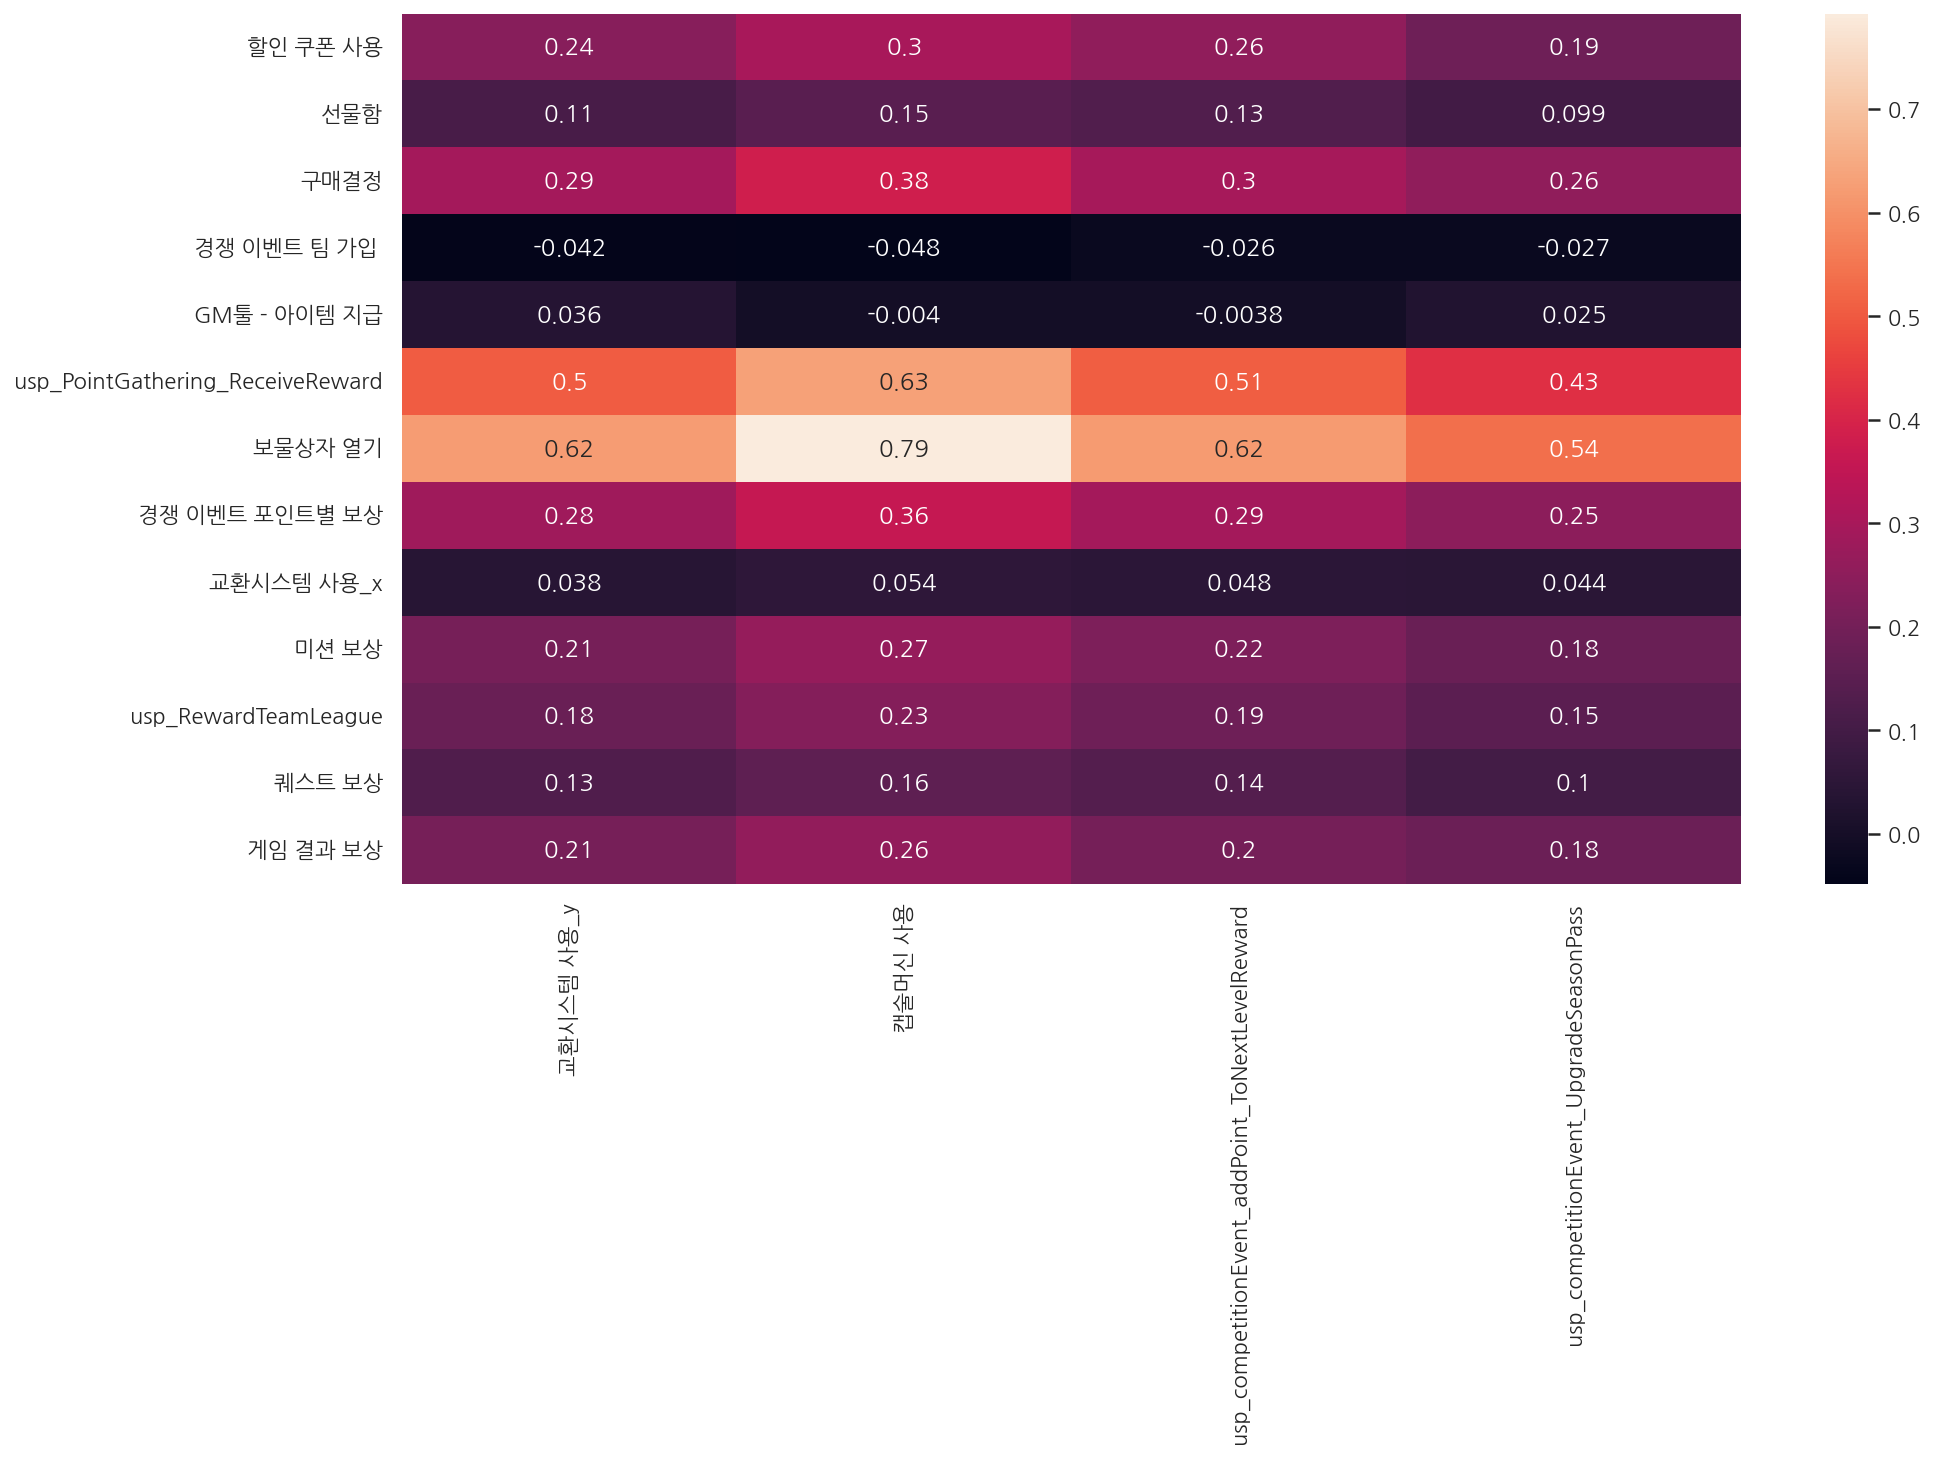

In [ ]:
sns.set(font = "NanumGothic", rc = {'figure.figsize':(15,8), "axes.unicode_minus" : False})

sns.heatmap(featuresCorrm_dr, annot = True)


# 시간에 따른 Desc의 추이

## 획득 데이터 클리닝

In [ ]:
gi_frame_d = gi_frame.drop(["fdUserNum", "fdAuthUserNum", "fdNickName", "fdItemNum", "fdItemName", "fdDesc", "fdCount", "fdResultCount"], axis = 1, inplace = False)

In [ ]:
gi_frame_d

,fdDateTime
0,2021-12-02 00:00:04.000
2,2021-12-02 00:00:06.000
3,2021-12-02 00:00:06.000
6,2021-12-02 00:00:07.000
7,2021-12-02 00:00:07.000
...,...
6741265,2021-12-08 23:59:58.000
6741266,2021-12-08 23:59:59.000
6741267,2021-12-08 23:59:59.000
6741269,2021-12-08 23:59:59.000


In [ ]:
gi_frame_df = gi_frame_d.reset_index(drop=True)

gi_frame_df

,fdDateTime
0,2021-12-02 00:00:04.000
1,2021-12-02 00:00:06.000
2,2021-12-02 00:00:06.000
3,2021-12-02 00:00:07.000
4,2021-12-02 00:00:07.000
...,...
2081118,2021-12-08 23:59:58.000
2081119,2021-12-08 23:59:59.000
2081120,2021-12-08 23:59:59.000
2081121,2021-12-08 23:59:59.000


In [ ]:
Idxd = Idx.copy()

In [ ]:
Idxd

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081118,0,0,0,0,0,0,1,0,0,0,0,0,0
2081119,0,0,0,0,0,0,0,0,0,1,0,0,0
2081120,0,0,0,0,0,0,1,0,0,0,0,0,0
2081121,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
Idxd.insert(0, 'fdDateTime', gi_frame_df['fdDateTime'])

Idxd

,fdDateTime,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,2021-12-02 00:00:04.000,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-12-02 00:00:06.000,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-12-02 00:00:06.000,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-12-02 00:00:07.000,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-12-02 00:00:07.000,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081118,2021-12-08 23:59:58.000,0,0,0,0,0,0,1,0,0,0,0,0,0
2081119,2021-12-08 23:59:59.000,0,0,0,0,0,0,0,0,0,1,0,0,0
2081120,2021-12-08 23:59:59.000,0,0,0,0,0,0,1,0,0,0,0,0,0
2081121,2021-12-08 23:59:59.000,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
mlr_datad = Idxd.copy()

In [ ]:
mlr_datad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081123 entries, 0 to 2081122
Data columns (total 14 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   fdDateTime                        object
 1   할인 쿠폰 사용                          int64 
 2   선물함                               int64 
 3   구매결정                              int64 
 4   경쟁 이벤트 팀 가입                       int64 
 5   GM툴 - 아이템 지급                      int64 
 6   usp_PointGathering_ReceiveReward  int64 
 7   보물상자 열기                           int64 
 8   경쟁 이벤트 포인트별 보상                    int64 
 9   교환시스템 사용                          int64 
 10  미션 보상                             int64 
 11  usp_RewardTeamLeague              int64 
 12  퀘스트 보상                            int64 
 13  게임 결과 보상                          int64 
dtypes: int64(13), object(1)
memory usage: 222.3+ MB


In [ ]:
mlr_datad['fdDateTime'] = pd.to_datetime(mlr_datad['fdDateTime'])

In [ ]:
mlr_datad

,fdDateTime,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상
0,2021-12-02 00:00:04,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-12-02 00:00:06,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-12-02 00:00:06,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-12-02 00:00:07,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-12-02 00:00:07,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081118,2021-12-08 23:59:58,0,0,0,0,0,0,1,0,0,0,0,0,0
2081119,2021-12-08 23:59:59,0,0,0,0,0,0,0,0,0,1,0,0,0
2081120,2021-12-08 23:59:59,0,0,0,0,0,0,1,0,0,0,0,0,0
2081121,2021-12-08 23:59:59,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
mlr_datadc = mlr_datad.resample('1T', on='fdDateTime').sum()

## 소비 데이터 클리닝

In [ ]:
dl_frame = dl_frame.drop_duplicates(['fdUserNum', 'fdDateTime'], keep='first')

dl_frame

,fdDateTime,fdAuthUserNum,fdUserNum,fdNickName,fdItemNum,fdDelCount,fdBeforeCount,fdAll,fdDesc
0,2021-12-02 06:45:07.710,10913471,14947265,김포션,96189,50,1010,0,교환시스템 사용
2,2021-12-02 06:45:10.163,10913471,14947265,김포션,96189,50,960,0,교환시스템 사용
4,2021-12-02 06:45:12.310,10913471,14947265,김포션,96189,50,910,0,교환시스템 사용
6,2021-12-02 06:45:15.463,10913471,14947265,김포션,96189,50,860,0,교환시스템 사용
8,2021-12-02 06:45:18.493,10913471,14947265,김포션,96189,50,810,0,교환시스템 사용
...,...,...,...,...,...,...,...,...,...
1650454,2021-12-08 23:59:55.963,77361983,18478628,nhy121,96189,15,56,0,캡술머신 사용
1650455,2021-12-08 23:59:57.807,10671964,10337536,송양,96189,15,122,0,캡술머신 사용
1650456,2021-12-08 23:59:57.907,55289817,12653888,무햐,96189,15,103,0,캡술머신 사용
1650457,2021-12-08 23:59:58.230,127528657,19353965,둥이나인,96189,50,55,0,교환시스템 사용


In [ ]:
dl_frame_d = dl_frame.drop(["fdUserNum","fdAuthUserNum", "fdNickName", "fdItemNum", "fdDesc", "fdDelCount", "fdBeforeCount", "fdAll"], axis = 1, inplace = False)

dl_frame_d

,fdDateTime
0,2021-12-02 06:45:07.710
2,2021-12-02 06:45:10.163
4,2021-12-02 06:45:12.310
6,2021-12-02 06:45:15.463
8,2021-12-02 06:45:18.493
...,...
1650454,2021-12-08 23:59:55.963
1650455,2021-12-08 23:59:57.807
1650456,2021-12-08 23:59:57.907
1650457,2021-12-08 23:59:58.230


In [ ]:
dl_frame_df = dl_frame_d.reset_index(drop=True)

dl_frame_df

,fdDateTime
0,2021-12-02 06:45:07.710
1,2021-12-02 06:45:10.163
2,2021-12-02 06:45:12.310
3,2021-12-02 06:45:15.463
4,2021-12-02 06:45:18.493
...,...
957993,2021-12-08 23:59:55.963
957994,2021-12-08 23:59:57.807
957995,2021-12-08 23:59:57.907
957996,2021-12-08 23:59:58.230


In [ ]:
ddxc = ddx.copy()

ddxc

,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
957993,0,1,0,0
957994,0,1,0,0
957995,0,1,0,0
957996,1,0,0,0


In [ ]:
ddxc.insert(0, 'fdDateTime', dl_frame_df['fdDateTime'])

ddxc

,fdDateTime,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,2021-12-02 06:45:07.710,1,0,0,0
1,2021-12-02 06:45:10.163,1,0,0,0
2,2021-12-02 06:45:12.310,1,0,0,0
3,2021-12-02 06:45:15.463,1,0,0,0
4,2021-12-02 06:45:18.493,1,0,0,0
...,...,...,...,...,...
957993,2021-12-08 23:59:55.963,0,1,0,0
957994,2021-12-08 23:59:57.807,0,1,0,0
957995,2021-12-08 23:59:57.907,0,1,0,0
957996,2021-12-08 23:59:58.230,1,0,0,0


In [ ]:
mri_datad = ddxc.copy()

In [ ]:
mri_datad

,fdDateTime,교환시스템 사용,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,2021-12-02 06:45:07.710,1,0,0,0
1,2021-12-02 06:45:10.163,1,0,0,0
2,2021-12-02 06:45:12.310,1,0,0,0
3,2021-12-02 06:45:15.463,1,0,0,0
4,2021-12-02 06:45:18.493,1,0,0,0
...,...,...,...,...,...
957993,2021-12-08 23:59:55.963,0,1,0,0
957994,2021-12-08 23:59:57.807,0,1,0,0
957995,2021-12-08 23:59:57.907,0,1,0,0
957996,2021-12-08 23:59:58.230,1,0,0,0


In [ ]:
mri_datad['fdDateTime'] = pd.to_datetime(mri_datad['fdDateTime'])

In [ ]:
mri_datadc = mri_datad.resample('1T', on='fdDateTime').sum()

### 분당 데이터

In [ ]:
merge_innerd = pd.merge(mlr_datadc, mri_datadc, on='fdDateTime')

merge_innerd

,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
fdDateTime,,,,,,,,,,,,,,,,,
2021-12-02 06:45:00,0,0,0,0,0,1,0,0,0,0,0,0,0,14,0,0,0
2021-12-02 06:46:00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2021-12-02 06:47:00,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0
2021-12-02 06:48:00,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0
2021-12-02 06:49:00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08 23:55:00,22,11,0,5,0,28,119,13,15,84,0,10,0,3,149,4,1
2021-12-08 23:56:00,1,11,0,4,0,29,100,4,4,57,0,5,0,0,222,9,0
2021-12-08 23:57:00,0,6,0,3,0,25,105,6,4,38,0,6,0,8,211,7,0


In [ ]:
merge_innerd.to_csv('eyes.csv')

### 시각화

https://public.tableau.com/app/profile/.75992107/viz/_16402433217110/1_2

보물상자로 획득한 코인은 대부분 캡슐머신에 사용되고 있으며 코인사용은 매 시 50분 ~ 10분 사이에 많은 유동이 이루어지고 있음 이유는 해당 컨텐츠의 개방시간이 정해져 있기 때문인데 이는 맞춰서 하지않으면 손해를 본다는 강박관념이 생겨 플레이타임에 스트레스를 받게 됨. 따라서 다른 시간대를 이용해도 손해가 느껴지지 않는다는 생각이 들도록 컨텐츠 개선을 하거나 보상시스템의 개선이 필요함.

## -------------------------------------------------

In [ ]:
merge_innerdt = pd.merge(mlr_datad, mri_datad, how='outer', on=['fdDateTime'])

merge_innerdt

,fdDateTime,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,2021-12-02 00:00:04.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2021-12-02 00:00:06.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2021-12-02 00:00:06.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2021-12-02 00:00:07.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2021-12-02 00:00:07.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035732,2021-12-08 23:59:55.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3035733,2021-12-08 23:59:57.807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3035734,2021-12-08 23:59:57.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3035735,2021-12-08 23:59:58.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [ ]:
merge_innerdt = merge_innerdt.fillna(0)

In [ ]:
merge_innerdt

,fdDateTime,fdUserNum,할인 쿠폰 사용,선물함,구매결정,경쟁 이벤트 팀 가입,GM툴 - 아이템 지급,usp_PointGathering_ReceiveReward,보물상자 열기,경쟁 이벤트 포인트별 보상,교환시스템 사용_x,미션 보상,usp_RewardTeamLeague,퀘스트 보상,게임 결과 보상,교환시스템 사용_y,캡술머신 사용,usp_competitionEvent_addPoint_ToNextLevelReward,usp_competitionEvent_UpgradeSeasonPass
0,2021-12-02 00:00:04.000,7672566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-02 00:00:06.000,18269687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-02 00:00:06.000,4320649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-02 00:00:07.000,14936475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-02 00:00:07.000,13103902,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039098,2021-12-08 23:59:55.963,18478628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3039099,2021-12-08 23:59:57.807,10337536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3039100,2021-12-08 23:59:57.907,12653888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3039101,2021-12-08 23:59:58.230,19353965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# merge_innerdt.to_csv('eyesna.csv')

#### ----------------------------------------------------

-----------------------------------------------

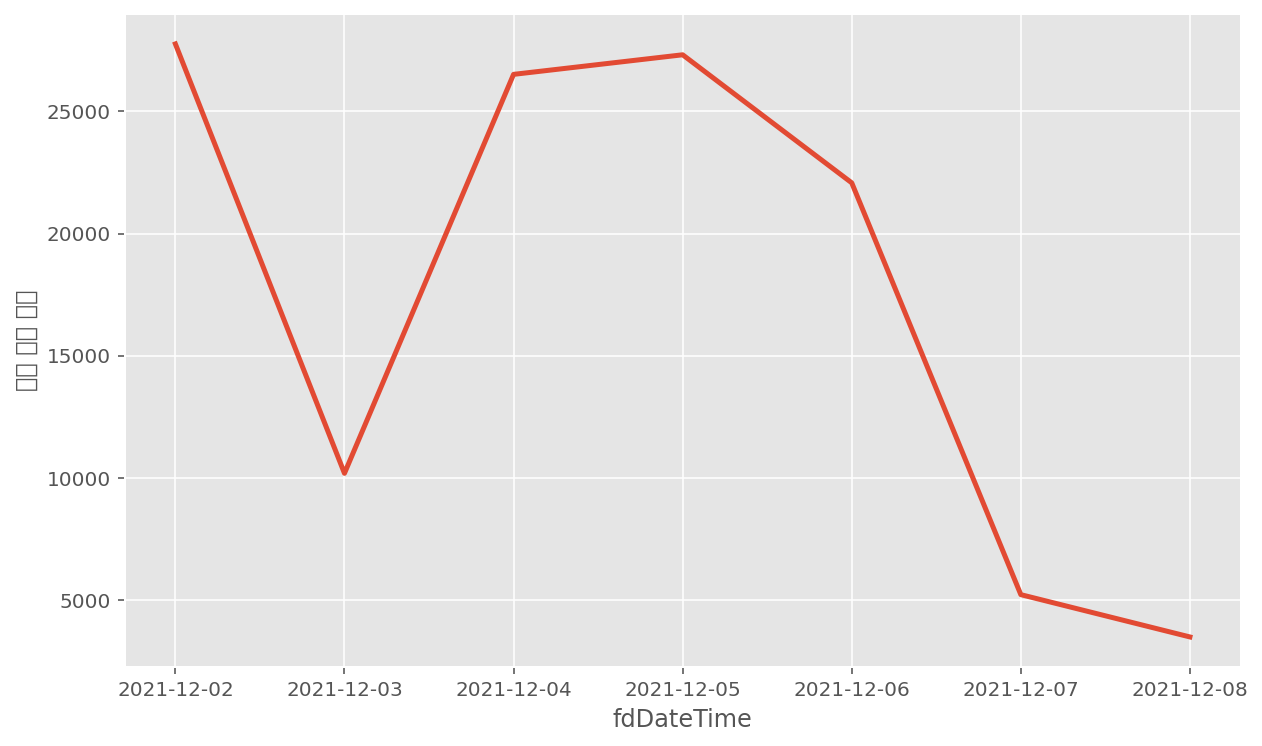

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
g1 = sns.lineplot(data = merge_innerd["할인 쿠폰 사용"], palette="tab10", sizes=(.25, 2.5), linewidth=2.5)


plt.show()

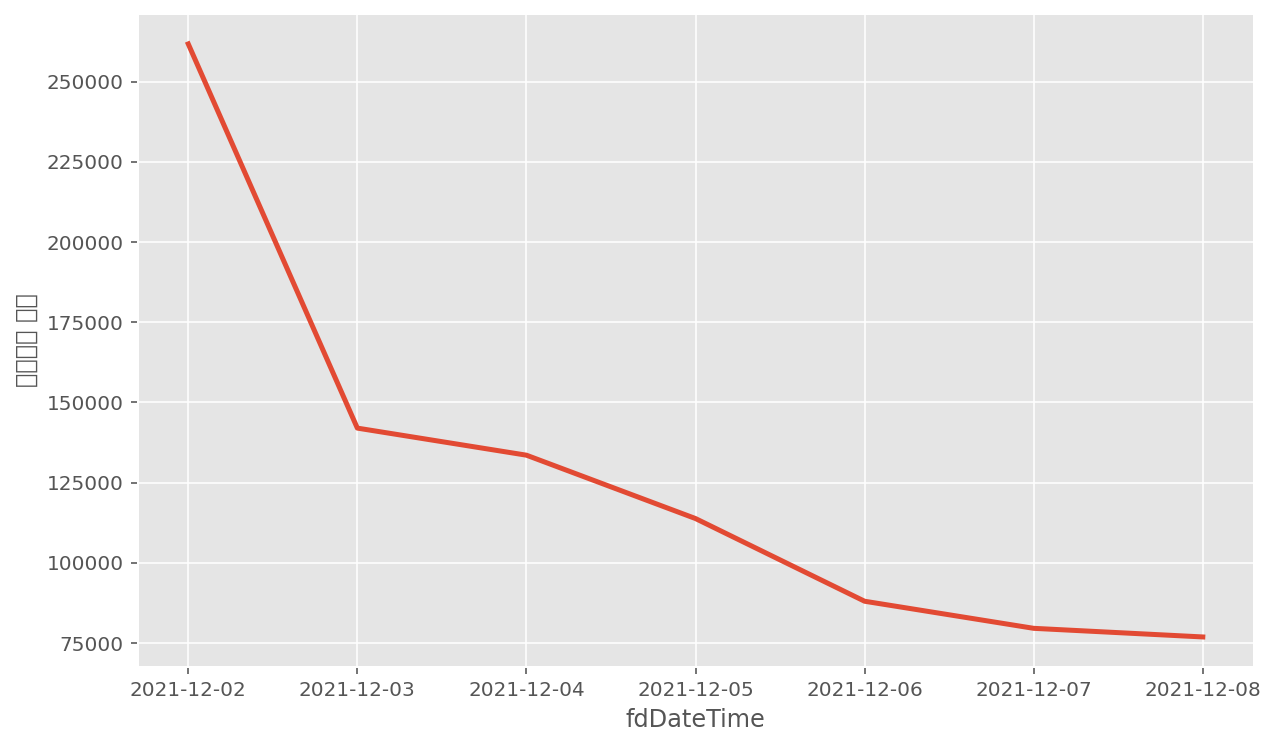

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
g2 = sns.lineplot(data = merge_innerd["캡술머신 사용"], palette="tab10", sizes=(.25, 2.5), linewidth=2.5)


plt.show()

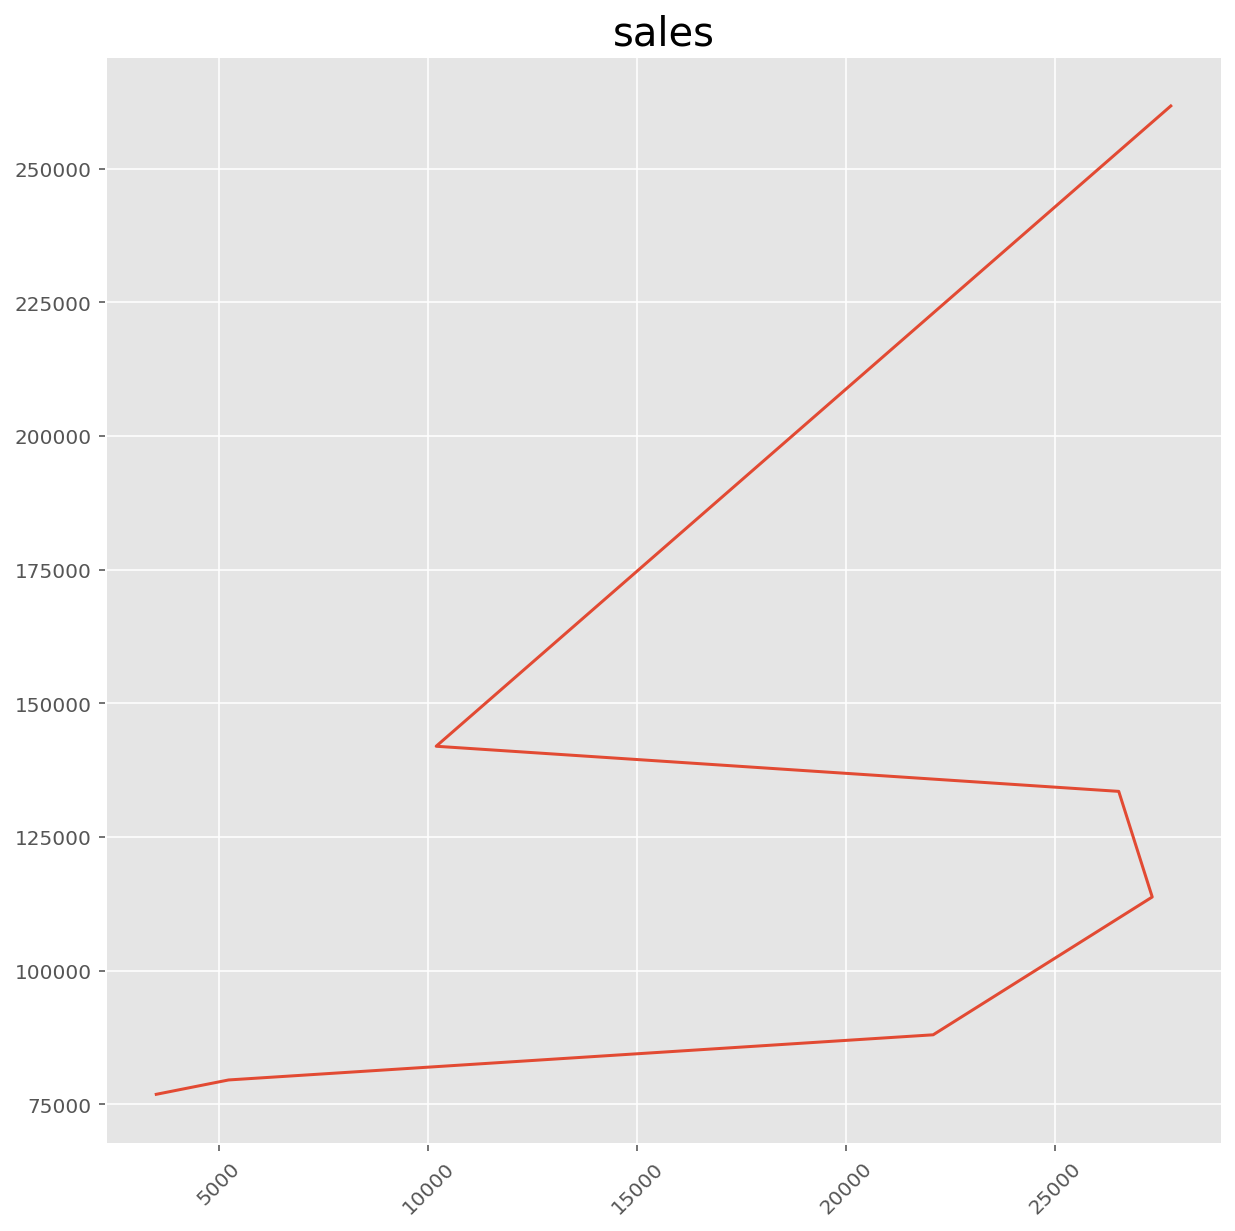

## --------------------------------------------------

In [ ]:
gi_processed = sm.add_constant(mlr_data, has_constant = "add")
gi_processed

In [ ]:
feature_columns = gi_processed.columns.difference(["할인 쿠폰 사용"])
X = gi_processed[feature_columns]
y = gi_processed["할인 쿠폰 사용"]

train_x, test_X, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [ ]:
model = sm.Logit(train_y, train_x)
results = model.fit(method = "newton")

In [ ]:
corr = mlr_data.corr(method = 'pearson')

corr

In [ ]:
feature_columns = mlr_data.columns.difference(["fdUserNum"])

X = mlr_data[feature_columns]
y = mlr_data.fdUserNum

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size= 0.7, test_size=0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [ ]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in
                     range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

In [ ]:
res = fitted_full_model.resid

fig = sm.qqplot(res,fit = True, line = '45')

In [ ]:
import matplotlib.pyplot as plt 

pred_y2 = fitted_full_model.predict(test_x)

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true = test_y, y_pred = pred_y2)

In [ ]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model" : regr, "AIC" : AIC}

print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

In [ ]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

In [ ]:
import time
import itertools

models = pd.DataFrame(columns=["AIC", "model"])

models